# Importing Librarires

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import random

# Sklearn

In [2]:
from sklearn.model_selection import train_test_split

# TensorFlow

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data

In [4]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [5]:
data_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data_train.shape, data_test.shape

((42000, 785), (28000, 784))

In [8]:
data_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [9]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [10]:
data_train.isna().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [11]:
n_train = data_train.shape[0]

X = pd.concat([data_train.drop('label', axis=1), data_test], axis=0).astype('float32')
y = data_train['label'].astype('int32')

X.shape, y.shape

((70000, 784), (42000,))

In [12]:
X.values[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
       188., 255.,  94.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

# Data Visulization

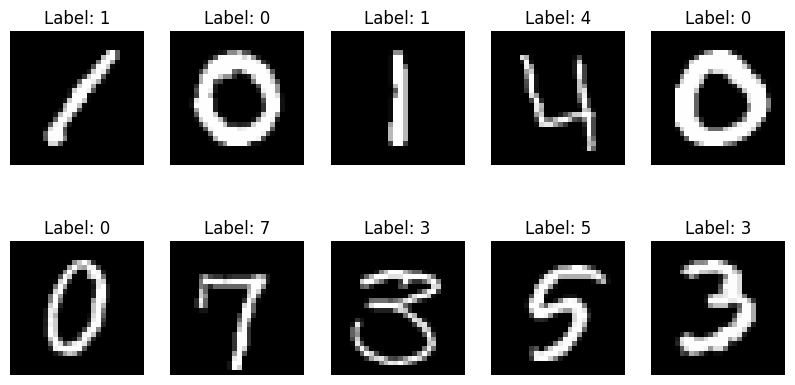

In [13]:
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5, i+1)
    plt.imshow(X.values[i].reshape(28,28), cmap='gray')
    plt.title(f'Label: {y[i]}')
    plt.axis('off')
plt.show()

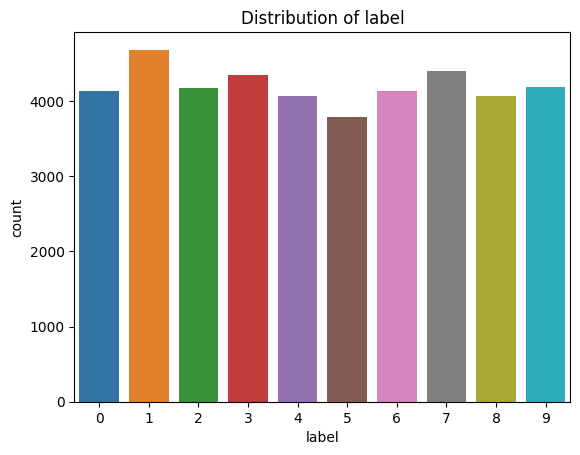

In [14]:
sns.countplot(data=y.to_frame(), x='label')
plt.title('Distribution of label')
plt.show()

In [15]:
# Normalize the values
X /= 255

In [16]:
X = X.values.reshape(-1, 28, 28, 1)

X.shape

(70000, 28, 28, 1)

In [17]:
y = tf.keras.utils.to_categorical(y, num_classes=10)
y.shape

(42000, 10)

In [18]:
X_train = X[:n_train]
y_train = y[:n_train]
X_test = X[n_train:]

X_train.shape, y_train.shape, X_test.shape

((42000, 28, 28, 1), (42000, 10), (28000, 28, 28, 1))

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, shuffle=True, stratify=y_train)

In [21]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((37800, 28, 28, 1), (37800, 10), (4200, 28, 28, 1), (4200, 10))

In [22]:
model = Sequential([
    Conv2D(32, (5,5), padding='same', activation='relu', input_shape=(28,28,1)),
    Conv2D(32, (5,5), padding='same', activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    BatchNormalization(),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    BatchNormalization(),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.25),
    BatchNormalization(),
    Dense(10, activation='softmax')])

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    zoom_range=0.1,
    height_shift_range=0.1,
    vertical_flip=False,
    horizontal_flip=False)

In [25]:
datagen.fit(X_train)

In [26]:
batch_size = 128
epochs = 30
steps_per_epoch = X_train.shape[0] // batch_size

In [27]:
train_gen = datagen.flow(X_train, y_train, batch_size=batch_size, shuffle=True, seed=42)
val_gen = datagen.flow(X_val, y_val, batch_size=batch_size, shuffle=True, seed=42)

In [28]:
history = model.fit(train_gen, epochs=epochs, validation_data=val_gen)

Epoch 1/30
296/296 [==============================] - 107s 351ms/step - loss: 0.3057 - accuracy: 0.9037 - val_loss: 1.3782 - val_accuracy: 0.6005
Epoch 2/30
296/296 [==============================] - 100s 337ms/step - loss: 0.0935 - accuracy: 0.9711 - val_loss: 0.0518 - val_accuracy: 0.9843
Epoch 3/30
296/296 [==============================] - 110s 372ms/step - loss: 0.0728 - accuracy: 0.9771 - val_loss: 0.1173 - val_accuracy: 0.9667
Epoch 4/30
296/296 [==============================] - 112s 380ms/step - loss: 0.0576 - accuracy: 0.9822 - val_loss: 0.0445 - val_accuracy: 0.9869
Epoch 5/30
296/296 [==============================] - 109s 367ms/step - loss: 0.0513 - accuracy: 0.9837 - val_loss: 0.0473 - val_accuracy: 0.9864
Epoch 6/30
296/296 [==============================] - 106s 359ms/step - loss: 0.0503 - accuracy: 0.9847 - val_loss: 0.0782 - val_accuracy: 0.9769
Epoch 7/30
296/296 [==============================] - 117s 396ms/step - loss: 0.0424 - accuracy: 0.9868 - val_loss: 0.0390 -

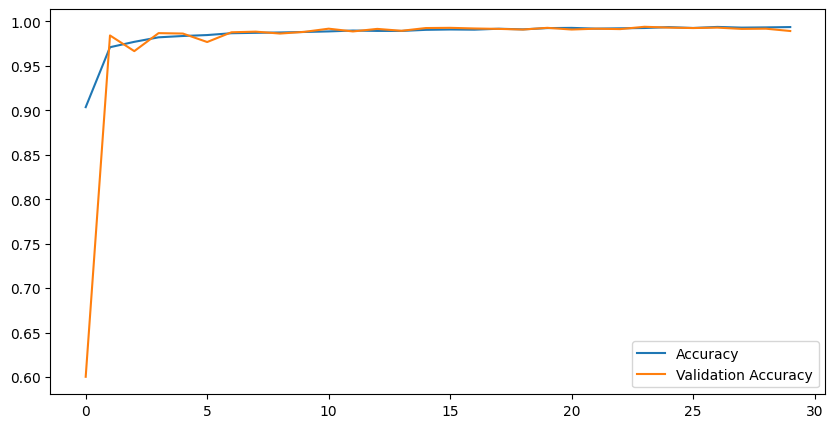

In [29]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

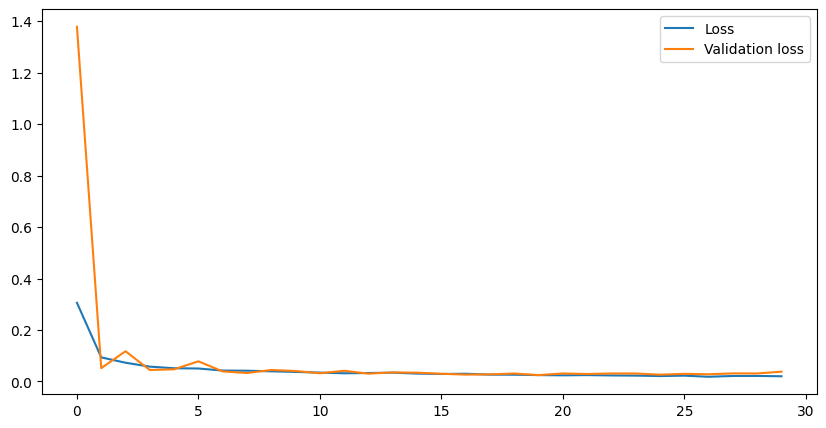

In [30]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

In [31]:
y_pred = model.predict(X_test)

875/875 [==============================] - 11s 13ms/step


In [40]:
history.save('Digit_recognizer.h5')

AttributeError: 'History' object has no attribute 'save'

In [32]:
submission = pd.read_csv('sample_submission.csv')

In [33]:
submission['label'] = y_pred.argmax(axis=1)

In [34]:
submission.to_csv('sample_submission.csv', index=False)

In [39]:
output = pd.DataFrame({'Label' : y_pred})

ValueError: Per-column arrays must each be 1-dimensional